In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Recursos/DLAB/covid19geomodeller/covid19geomodeller/julia`


In [20]:
function scale_test(unitTest::Function ;NRange = 10_000:10_000:100_000, ndays = 100)
    times = []
    for numAgents in NRange
        t = @elapsed unitTest(N = numAgents, ndays = ndays)
        push!(times,t)
    end
    plot(NRange,times; xlabel="N",ylabel="Time (s)")
end

scale_test (generic function with 1 method)

In [57]:
include("./modules.jl")

using Distributions, Plots, Graphs

# SIR

## SIR abstractSpace

In [49]:
import .SIRAbstractSpace as SIRx

function unit_test_SIRa(;N = 10_000 , ndays = nothing)
    NInfected = 100
    distGetWell() = rand(Normal(10.0, 2.0))
    chanceInfect(day) = 0.3 
    chanceMeet(day) = 1.0

    population , infected = SIRx.build_population(N, NInfected, distGetWell)
    model = SIRx.Model(population, infected, chanceInfect, chanceMeet, distGetWell, 5)
    data = SIRx.run_sim!(model, ndays)
    return data
end

function scale_test_SIRa(;NRange = 10_000:10_000:100_000, ndays = 100)
    times = []
    for numAgents in NRange
        t = @elapsed unit_test_SIRx(N = numAgents, ndays = ndays)
        push!(times,t)
    end
    plot(NRange,times; xlabel="N",ylabel="Time (s)")
end


scale_test_SIRa (generic function with 1 method)

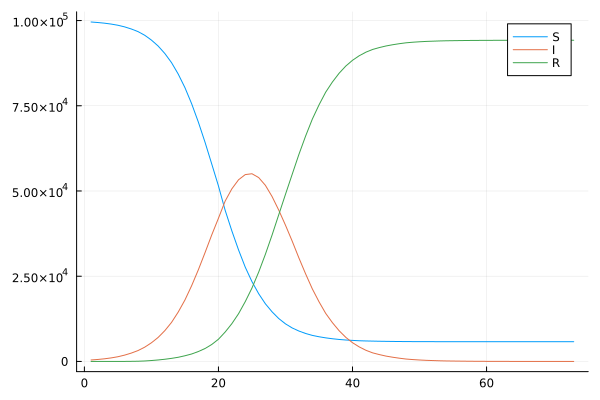

In [50]:
data = unit_test_SIRa(N = 100_000)

totals = data.totals

plot(totals[:S], label = "S")
plot!(totals[:I], label = "I")
plot!(totals[:R], label = "R")

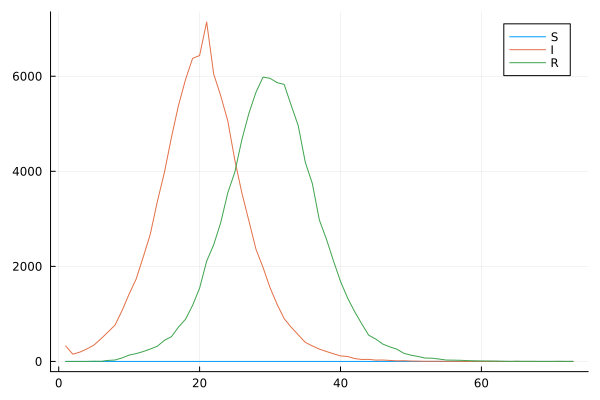

In [51]:
daily = data.daily
plot(daily[:S], label = "S")
plot!(daily[:I], label = "I")
plot!(daily[:R], label = "R")

## SIR graphSpace

In [28]:
import .SIRGraphSpace as SIRg

function unit_test_SIRg(;N=10_000, ndays = nothing)
    #parameters
    NInfected = 10
    chanceMeet(day) = 5
    chanceInfect(day) = 0.3
    distGetWell() = rand(Normal(10, 4))
    
    population, infected = SIRg.build_population(N, NInfected, () -> distGetWell()/2)
    graph = watts_strogatz(N, 4, 0.51)
    model = SIRg.Model(population, infected, chanceMeet, chanceInfect, distGetWell, 5, graph = graph)
    data = SIRg.run_sim!(model, ndays)
    return data
end


unit_test_SIRg (generic function with 1 method)

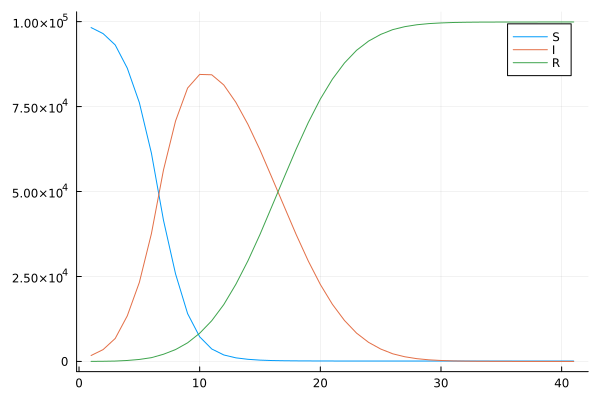

In [29]:
data = unit_test_SIRg(N = 100_000)
plot(data.totals[:S], label = "S")
plot!(data.totals[:I], label = "I")
plot!(data.totals[:R], label = "R")

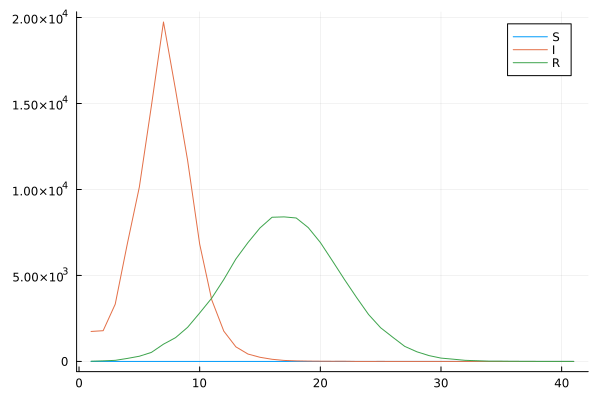

In [30]:
daily = data.daily
plot(daily[:S], label = "S")
plot!(daily[:I], label = "I")
plot!(daily[:R], label = "R")


In [40]:
scale_test(unit_test_SIRg, NRange = 10_000:10_000:100_000)

UndefVarError: UndefVarError: scale_test not defined

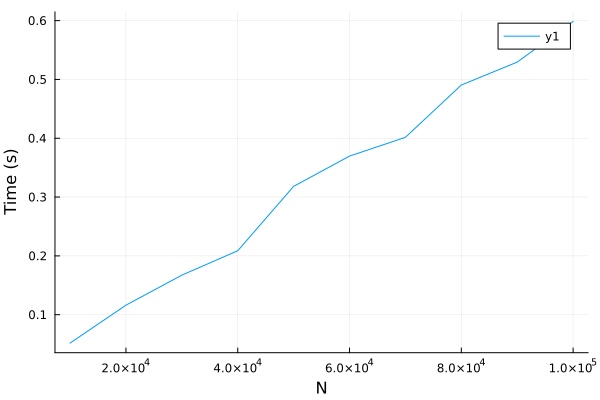

In [159]:
scale_test(unit_test_SIRa, NRange = 10_000:10_000:100_000)

# SEIR

## SEIR abstractSpace

In [42]:
import .SEIRAbstractSpace as SEIRa

function unit_test_SEIRa(;N = 10_000 , ndays = nothing)
    #parameters
    chanceInfect(day::Int) = 0.7
    chanceMeet(day::Int) = 0.2
    distGetInfected() = rand(Normal(10.0, 2.0))
    distGetWell() = rand(Normal(10.0, 2.0))

    #create population
    Ninfected = 10
    Nexposed = 0
    Nrecovered = 0
    Nsusceptible = N - Ninfected - Nexposed - Nrecovered
    population, exposed, infected = SEIRa.build_population(Nsusceptible, Nexposed, Ninfected, Nrecovered, distGetWell, distGetInfected)

    model = SEIRa.Model(population, exposed, infected, chanceInfect, chanceMeet, distGetWell, distGetInfected, 5)
    data = SEIRa.run_sim!(model, ndays)
    return data
end


unit_test_SEIRa (generic function with 1 method)

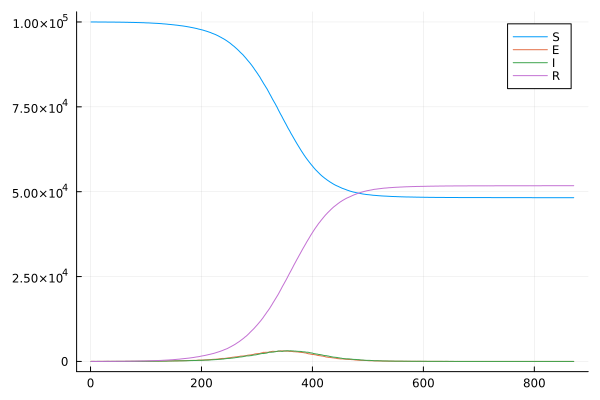

In [43]:
data = unit_test_SEIRa(N = 100_000)
totals = data.totals 
plot(totals[:S], label="S")
plot!(totals[:E], label="E")
plot!(totals[:I], label="I")
plot!(totals[:R], label="R")

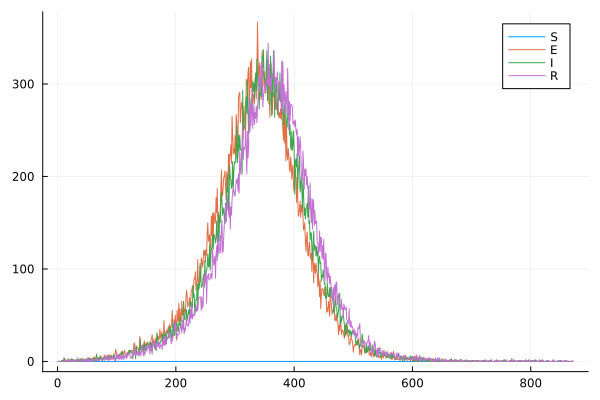

In [44]:
daily = data.daily
plot(daily[:S], label="S")
plot!(daily[:E], label="E")
plot!(daily[:I], label="I")
plot!(daily[:R], label="R")

## SEIR graphSpace

In [17]:
import .SEIRGraphSpace as SEIRg

function unit_testSEIRg(;N=10_000, ndays=nothing)
    #parameters
    chanceInfect(day) = 0.3
    chanceMeet(day) = 0.2
    distGetInfected() = rand(Normal(10.0, 2.0))
    distGetWell() = rand(Normal(10.0, 2.0))

    #create population
    Ninfected = 10
    Nexposed = 0
    Nrecovered = 0
    Nsusceptible = N - Ninfected - Nexposed - Nrecovered
    population, exposed, infected = SEIRg.build_population(Nsusceptible, Nexposed, Ninfected, Nrecovered, distGetWell, distGetInfected)
    graph = watts_strogatz(N, 4, 0.51)

    model = SEIRg.Model(population, exposed, infected, chanceInfect, chanceMeet, distGetWell, distGetInfected, 5 ; graph = graph)
    data = SEIRg.run_sim!(model, ndays)
    return data
end

unit_testSEIRg (generic function with 1 method)

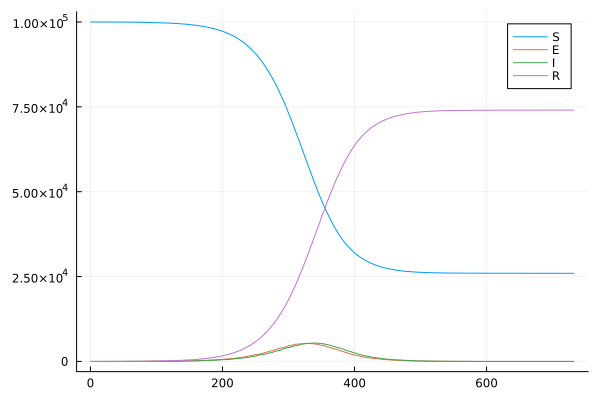

In [18]:
data = unit_testSEIRg(N = 100_000)
totals = data.totals
plot(totals[:S], label="S")
plot!(totals[:E], label="E")
plot!(totals[:I], label="I")
plot!(totals[:R], label="R")


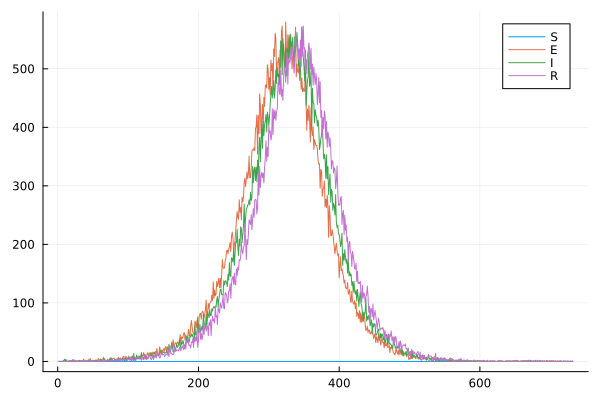

In [19]:
daily = data.daily
plot(daily[:S], label="S")
plot!(daily[:E], label="E")
plot!(daily[:I], label="I")
plot!(daily[:R], label="R")

# SEIRHVD

## SEIRHVD abstractSpace

In [58]:
import .SEIRHVDAbstractSpace as SEIRHVDa
using Distributions, Plots

function unit_test_SEIRHVDa(;N = 100_000, ndays = 500)
    #parameters
    stepsPerDay = 5
    chanceInfect = Dict{Tuple{Bool,Bool}, Function}(
        (true, true) => (day) -> 0.3,
        (true, false) => (day) -> 0.3, 
        (false, true) => (day) -> 0.3, 
        (false, false) => (day) -> 0.3)
    chanceMeet(day) = 2
    chanceHospitalize(day) = 0.3
    probDieHosp(day) = 0.3 #prob of recover, prob of die
    vaccinesPerDay(day) = 0 #200 < day < 300 ? div(N, 200) : 0

    #distributions
    distGetSick() = rand(Normal(5.0, 2.0))
    distsRecover = Dict{Bool,Function}(
        true => () -> rand(Normal(10.0, 2.0)), 
        false => () -> rand(Normal(10.0, 2.0)))
    distsCriticalDie = Dict{Bool,Function}(
        true => () -> rand(Normal(6.0, 2.0)), 
        false => () -> rand(Normal(6.0, 2.0)))
    distHospitalDie() = rand(Normal(10.0, 2.0))
    distHospitalRecover() = rand(Normal(10.0, 2.0))
    distLooseInmunity() = rand(Normal(10000000.0, 2.0))

    #create population
    nStates = Dict{Symbol,Int64}(
        :S => N - 80,
        :Sv => 0,
        :E => 0,
        :Ev => 0,
        :Im => 10,
        :Ivm => 0,
        :Ivcr => 0,
        :Icr => 10,
        :R => 10,
        :H => 10,
        :D => 0)
    
    
    population, compartments = SEIRHVDa.build_population(
        nStates, 
        distGetSick, 
        distsRecover[false],
        distsCriticalDie[false], 
        distLooseInmunity)

    model = SEIRHVDa.Model( 
        population,
        compartments,

        chanceMeet,
        chanceInfect,
        chanceHospitalize,
        probDieHosp,
        vaccinesPerDay,

        distGetSick,
        distsRecover,
        distsCriticalDie,
        distHospitalDie,
        distHospitalRecover,
        distLooseInmunity;

        stepsPerDay = stepsPerDay)
    
    return SEIRHVDa.run_sim!(model, ndays)
end
 

unit_test_SEIRHVDa (generic function with 1 method)

In [59]:
data = unit_test_SEIRHVDa(ndays=1500);

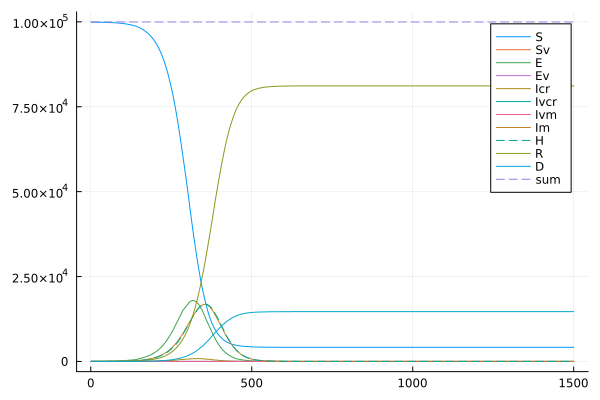

In [60]:
totals = data.totals
plot(totals[:S,false], label="S")
plot!(totals[:S,true], label="Sv")
plot!(totals[:E,false], label="E")
plot!(totals[:E,true], label="Ev")
plot!(totals[:Icr,false], label="Icr")
plot!(totals[:Icr,true], label="Ivcr")
plot!(totals[:Im,true], label="Ivm")
plot!(totals[:Im,false], label="Im")
plot!(totals[:H,true] .+ totals[:H,false], label="H", line=:dash)
plot!(totals[:R,true] .+ totals[:R,false], label="R")
plot!(totals[:D,true] .+ totals[:D,false], label="D")
sum = zeros(length(totals[:S,false]))
for i in 1:length(totals[:S,false])
    for state in [:S, :E, :Im, :Icr, :R, :H, :D]
        for vaccine in [true, false]
            sum[i] += totals[state, vaccine][i]
        end
    end
end
plot!(sum, label="sum", line=:dash)


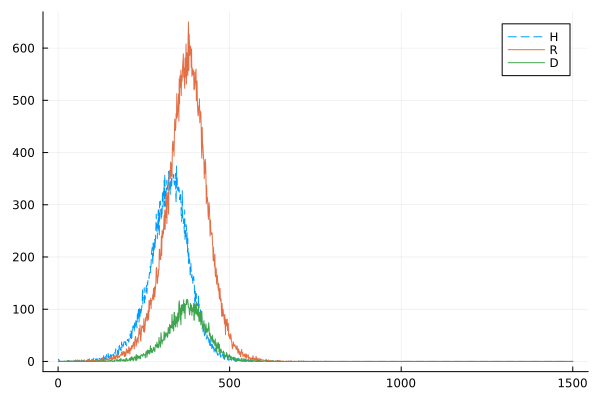

In [61]:
daily = data.daily
#plot(daily[:S,false], label="S")
#plot!(daily[:S,true], label="Sv")
#plot!(daily[:E,false], label="E")
#plot!(daily[:E,true], label="Ev")
#plot!(daily[:Icr,false], label="Icr")
#plot!(daily[:Icr,true], label="Ivcr")
#plot!(daily[:Im,true], label="Ivm")
#plot!(daily[:Im,false], label="Im")
plot(daily[:H,true] .+ daily[:H,false], label="H", line=:dash)
plot!(daily[:R,true] .+ daily[:R,false], label="R")
plot!(daily[:D,true] .+ daily[:D,false], label="D")



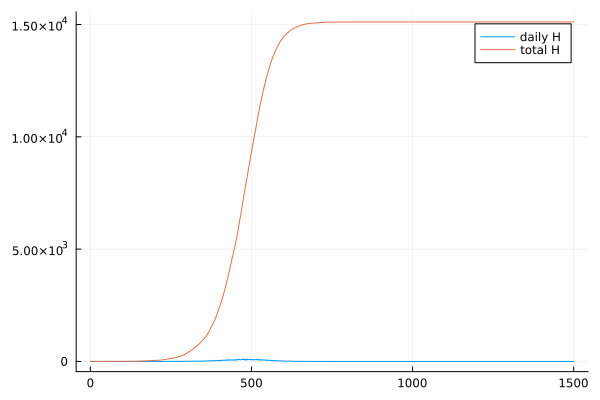

In [10]:
plot(daily[:D,true] .+ daily[:D, false], label="daily H")
plot!(totals[:D,true] .+ totals[:D, false], label="total H")

## SEIRHVD graphSpace

In [60]:
import .SEIRHVDGraphSpace as SEIRHVDg
using Distributions, Plots, Graphs

function unit_test_SEIRHVDg(; N = 10_000, ndays = 500)
    #parameters
    stepsPerDay = 5
    chanceInfect = Dict{Tuple{Bool,Bool},Function}(
        (true, true) => (day) -> 0.3, 
        (true, false) => (day) -> 0.3, 
        (false, true) => (day) -> 0.3,
        (false, false) => (day) -> 0.3)
    chanceMeet(day) = 0.2
    chanceHospitalize(day) = 0.3
    probDieHosp(day) = 0.3 #prob of recover, prob of die
    vaccinesPerDay(day) = div(N, 100)

    #distributions
    distGetSick() = rand(Normal(5.0, 2.0))
    distsRecover = Dict{Bool,Function}(
        true => () -> rand(Normal(10.0, 2.0)), 
        false => () -> rand(Normal(10.0, 2.0)))
    distsCriticalDie = Dict{Bool,Function}(
        true => () -> rand(Normal(5.0, 2.0)), 
        false => () -> rand(Normal(3.0, 2.0)))
    distHospitalDie() = rand(Normal(10.0, 2.0))
    distHospitalRecover() = rand(Normal(10.0, 2.0))
    distLooseInmunity() = rand(Normal(200.0, 2.0))

    #create population
    nStates = Dict{Symbol,Int64}(
        :S => N - 50,
        :Sv => 0,
        :E => 10,
        :Ev => 0,
        :Im => 10,
        :Ivm => 0,
        :Ivcr => 0,
        :Icr => 10,
        :R => 10,
        :H => 10,
        :D => 0)
    
    
    population, compartments = SEIRHVDg.build_population(
        nStates, 
        distGetSick, 
        distsRecover[false],
        distsCriticalDie[false], 
        distLooseInmunity)

    graph = watts_strogatz(N, 4, 0.51)
    model = SEIRHVDg.Model( 
        population,
        compartments,

        chanceMeet,
        chanceInfect,
        chanceHospitalize,
        probDieHosp,
        vaccinesPerDay,
        
        distGetSick,
        distsRecover,
        distsCriticalDie,
        distHospitalDie,
        distHospitalRecover,
        distLooseInmunity
        ;
        graph = graph,
        stepsPerDay = stepsPerDay)

    return SEIRHVDg.run_sim!(model, ndays)
end


unit_test_SEIRHVDg (generic function with 1 method)

In [63]:
data = unit_test_SEIRHVDg(ndays=2500);

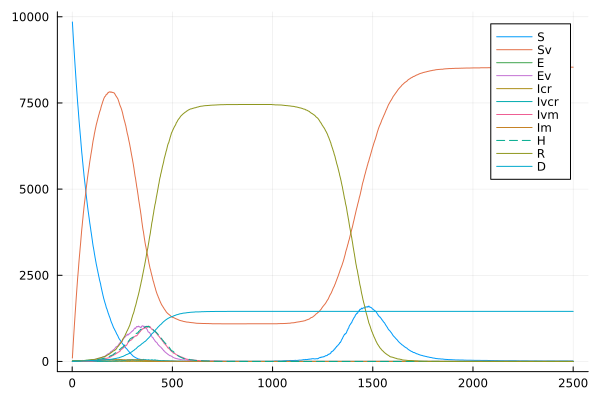

In [64]:
plot(data[:S,false], label="S")
plot!(data[:S,true], label="Sv")
plot!(data[:E,false], label="E")
plot!(data[:E,true], label="Ev")
plot!(data[:Icr,false], label="Icr")
plot!(data[:Icr,true], label="Ivcr")
plot!(data[:Im,true], label="Ivm")
plot!(data[:Im,false], label="Im")
plot!(data[:H,true] .+ data[:H,false], label="H", line=:dash)
plot!(data[:R,true] .+ data[:R,false], label="R")
plot!(data[:D,true] .+ data[:D,false], label="D")

In [26]:
function test_asendant_deaths(data)
    deaths = data[:D, true] .+ data[:D, false]
    for i in 2:length(deaths)
        if deaths[i] < deaths[i-1]
            return false
        end
    end
    return true
end

test_asendant_deaths(data)

true

In [28]:
function test_stable_totals_SEIRHVD(data)
    sum = zeros(length(data[:S,false]))
    for i in 1:length(data[:S,false])
        for state in [:S, :E, :Im, :Icr, :R, :H, :D], vaccine in [true, false]
                sum[i] += data[state, vaccine][i]
        end
    end

    for i in 2:length(sum)
        if sum[i] != sum[i-1]
            return false
        end
    end 
    return true
end

test_stable_totals(data)

true